# Principal compoenet analysis 실습

대부분의 머신러닝을 모듈에 포함하고, 이에 대한 예제와 정보가 담겨있는 웹사이트 참고: https://scikit-learn.org

# 1. 데이터 전처리 및 데이터 파악

- scikit-lean 패키지에서 데이터와 PCA 로드.

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA

- 자료 처리에 도움을 줄 pandas, numpy와 시각화를 위한 pyplot, seaborn 로드.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- iris 데이터를 불러오고, 구조를 살핌.

In [ ]:
iris=datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

- 설명의 편의를 위하여, 독립변수 중 처음 2개만을 사용.

In [ ]:
X=iris.data[:,[0,2]]
y=iris.target

In [ ]:
print(X.shape)
feature_names=[iris.feature_names[0],iris.feature_names[2]]
df_X=pd.DataFrame(X)
df_X.head()

(150, 2)


,0,1
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [ ]:
print(y.shape)
df_Y=pd.DataFrame(y)
df_Y.head()

(150,)


,0
0,0
1,0
2,0
3,0
4,0


- 결측치 여부를 파악.

In [ ]:
print(df_X.isnull().sum())
print(df_Y.isnull().sum())

0    0
1    0
dtype: int64
0    0
dtype: int64


In [ ]:
print(set(y))
iris.target_names

{0, 1, 2}


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- 종속 변수 (출력변수, 반응변수)의 분포를 살핌.

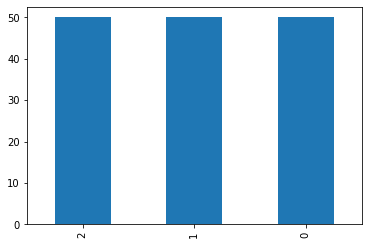

In [ ]:
df_Y[0].value_counts().plot(kind='bar')
plt.show()

- 독립 변수 (속성, 입력변수, 설명변수)의 분포를 살핌.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


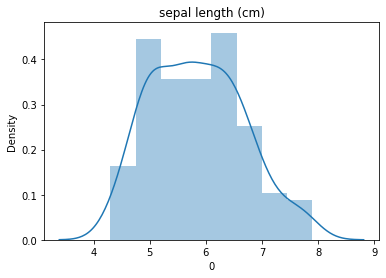

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


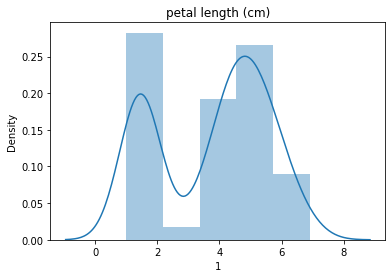

In [ ]:
for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

# 2. PCA 함수 활용 및 아웃풋 의미파악

- PCA 함수를 활용하여 PC를 얻어냄. 아래의 경우 PC 2개를 뽑아냄.

In [ ]:
pca=PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

- 아래와 같이 PC score를 얻어냄. 아래의 PC score를 이용하여, 회귀분석에 활용할 수 있음.

In [ ]:
PCscore=pca.transform(X)
PCscore[0:5]

array([[-2.46024094, -0.24479165],
       [-2.53896211, -0.06093579],
       [-2.70961121,  0.08355948],
       [-2.56511594,  0.25420858],
       [-2.49960153, -0.15286372]])

In [ ]:
eigens_v=pca.components_.transpose()
print(eigens_v)

[[ 0.39360585 -0.9192793 ]
 [ 0.9192793   0.39360585]]


In [ ]:
mX=np.matrix(X)
for i in range(X.shape[1]):
    mX[:,i]=mX[:,i]-np.mean(X[:,i])
dfmX=pd.DataFrame(mX)

In [ ]:
(mX*eigens_v)[0:5]

matrix([[-2.46024094, -0.24479165],
        [-2.53896211, -0.06093579],
        [-2.70961121,  0.08355948],
        [-2.56511594,  0.25420858],
        [-2.49960153, -0.15286372]])

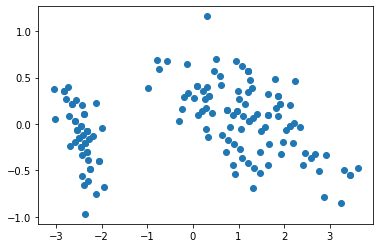

In [ ]:
plt.scatter(PCscore[:,0],PCscore[:,1])
plt.show()

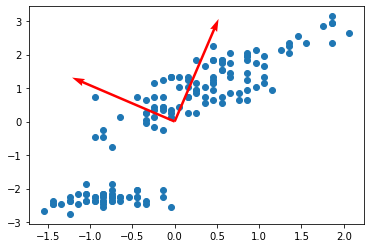

In [ ]:
plt.scatter(dfmX[0],dfmX[1])
origin = [0], [0] # origin point
plt.quiver(*origin, eigens_v[0,0], eigens_v[1,0], color=['r','b'], scale=3)
plt.quiver(*origin, eigens_v[0,1], eigens_v[1,1], color=['r','b'], scale=3)
plt.show()

# 3. PC를 활용한 회귀분석

- 이번에는 모든 독립변수를 활용하여 PC를 뽑아냄.

In [ ]:
X2 = iris.data
pca2 = PCA(n_components=4)
pca2.fit(X2)

In [ ]:
pca2.explained_variance_

In [ ]:
PCs=pca2.transform(X2)[:,0:2]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

- 모델의 복잡성으로 인하여 기존 자료를 이용한 분석은 수렴하지 않는 모습.

In [ ]:
clf = LogisticRegression(solver="sag",multi_class="multinomial").fit(X2,y)

- PC 2개 만을 뽑아내여 분석한 경우 모델이 수렴.

In [ ]:
clf2 = LogisticRegression(solver="sag",multi_class="multinomial").fit(PCs,y)

In [ ]:
confusion_matrix(y,clf2.predict(PCs))

- 임의로 변수 2개 만을 뽑아내여 분석한 경우 모델의 퍼포먼스가 하락함.

In [ ]:
clf = LogisticRegression(solver='sag', max_iter=1000, random_state=0,
                             multi_class="multinomial").fit(X2[:,0:2], y)

In [ ]:
confusion_matrix(y, clf.predict(X2[:,0:2]))

- 위와 같이, 차원축소를 통하여 모델의 복잡성을 줄이는 동시에 최대한 많은 정보를 활용하여 분석할 수 있음.